In [12]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

# Divide Data as Training-Set and Verification-Set.
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()

# The 30% of Entire data are for Verify Data.
X = digits.data
Y = digits.target

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
# Re-define variables that got data from train_test_split() function.
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

In [38]:
# Stack several Layers to construct Deep-Neural-Network(DNN).
k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10)
)

In [39]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

# Write DataLoader by Applying Training-Data.
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [40]:
# Training and Testing model that increased more data.
train_losses = []
test_losses = []

for epoch in range(100):
    running_loss = 0.0
    print("\n")
    print("Before training each data of running_loss : ", running_loss)
    
    for i, (xx, yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / i)
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())
    print("After trained each data of running_loss : ", running_loss)



Before training each data of running_loss :  0.0
After trained each data of running_loss :  53.80963695049286


Before training each data of running_loss :  0.0
After trained each data of running_loss :  12.402394279837608


Before training each data of running_loss :  0.0
After trained each data of running_loss :  7.412895008921623


Before training each data of running_loss :  0.0
After trained each data of running_loss :  3.922965906560421


Before training each data of running_loss :  0.0
After trained each data of running_loss :  3.31434179097414


Before training each data of running_loss :  0.0
After trained each data of running_loss :  2.6431896835565567


Before training each data of running_loss :  0.0
After trained each data of running_loss :  1.9410195425152779


Before training each data of running_loss :  0.0
After trained each data of running_loss :  2.0591138675808907


Before training each data of running_loss :  0.0
After trained each data of running_loss :  2.13902

After trained each data of running_loss :  0.0010765327347144193


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0010551048653724138


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0009872780901787337


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0009340080941910855


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0009387830891682825


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0008696483237145003


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0008246766192314681


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0007776253751217155


Before training each data of running_loss :  0.0
After trained each data of running_loss :  0.0007497833830711897


Befor

Train-Losses


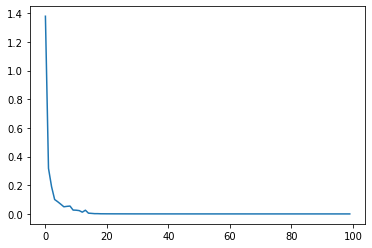

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt

print("Train-Losses")
plt.plot(train_losses)



Test-Losses


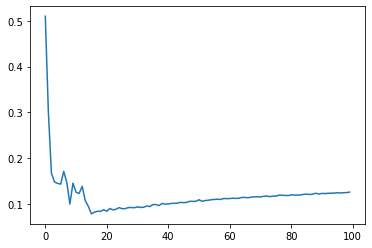

In [42]:
print("Test-Losses")
plt.plot(test_losses)

All Data


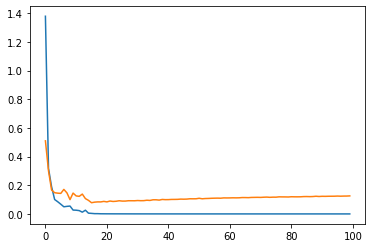

In [43]:
# Maybe I should not combine this two results of 
# trainied and tested model data..
print("All Data")
plt.plot(train_losses)
plt.plot(test_losses)